# **TASK 4**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For map visualization
!pip install folium
import folium
from folium.plugins import HeatMap


In [2]:
#load dataset
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving Dataset .csv to Dataset .csv


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
#clean data for mapping
df = df.dropna(subset=['Latitude', 'Longitude'])

df['City'] = df['City'].fillna("Unknown")
df['Locality'] = df['Locality'].fillna("Unknown")

print(df[['Latitude','Longitude','City','Locality']].head())


    Latitude   Longitude              City  \
0  14.565443  121.027535       Makati City   
1  14.553708  121.014101       Makati City   
2  14.581404  121.056831  Mandaluyong City   
3  14.585318  121.056475  Mandaluyong City   
4  14.584450  121.057508  Mandaluyong City   

                                     Locality  
0   Century City Mall, Poblacion, Makati City  
1  Little Tokyo, Legaspi Village, Makati City  
2  Edsa Shangri-La, Ortigas, Mandaluyong City  
3      SM Megamall, Ortigas, Mandaluyong City  
4      SM Megamall, Ortigas, Mandaluyong City  


In [4]:
#plot restaurant locations
# Center the map at average coordinates
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

map_restaurants = folium.Map(location=[center_lat, center_lon], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color="red",
        fill=True,
        fill_opacity=0.7
    ).add_to(map_restaurants)

map_restaurants


In [5]:
#heatmap of restaurant density
heat_df = df[['Latitude', 'Longitude']].dropna()

map_heat = folium.Map(location=[center_lat, center_lon], zoom_start=11)
HeatMap(data=heat_df.values.tolist(), radius=12).add_to(map_heat)

map_heat


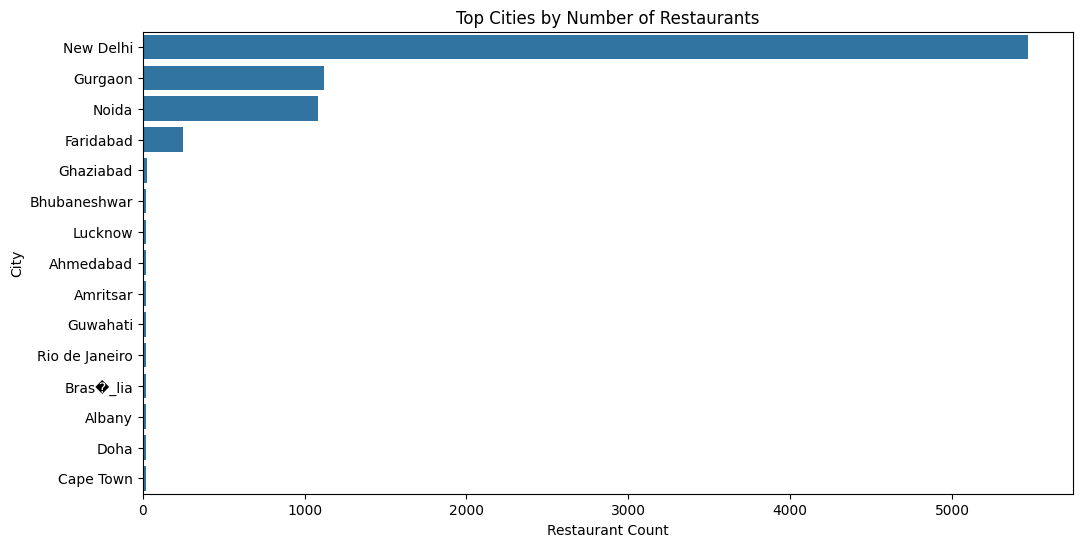

In [6]:
#restaurants per city
city_counts = df['City'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title("Top Cities by Number of Restaurants")
plt.xlabel("Restaurant Count")
plt.ylabel("City")
plt.show()


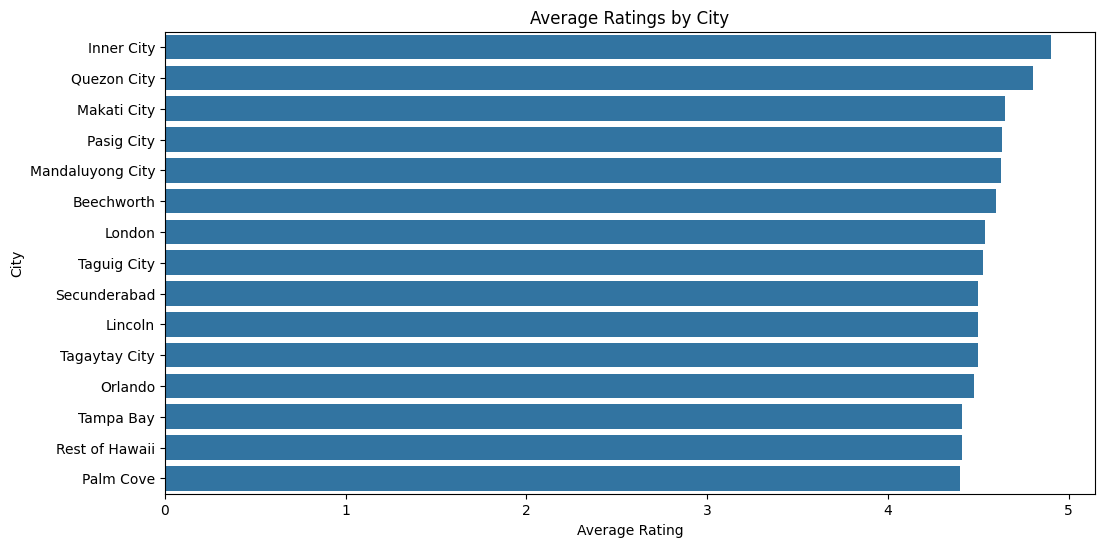

In [7]:
#average rating per city
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=city_rating.values, y=city_rating.index)
plt.title("Average Ratings by City")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()


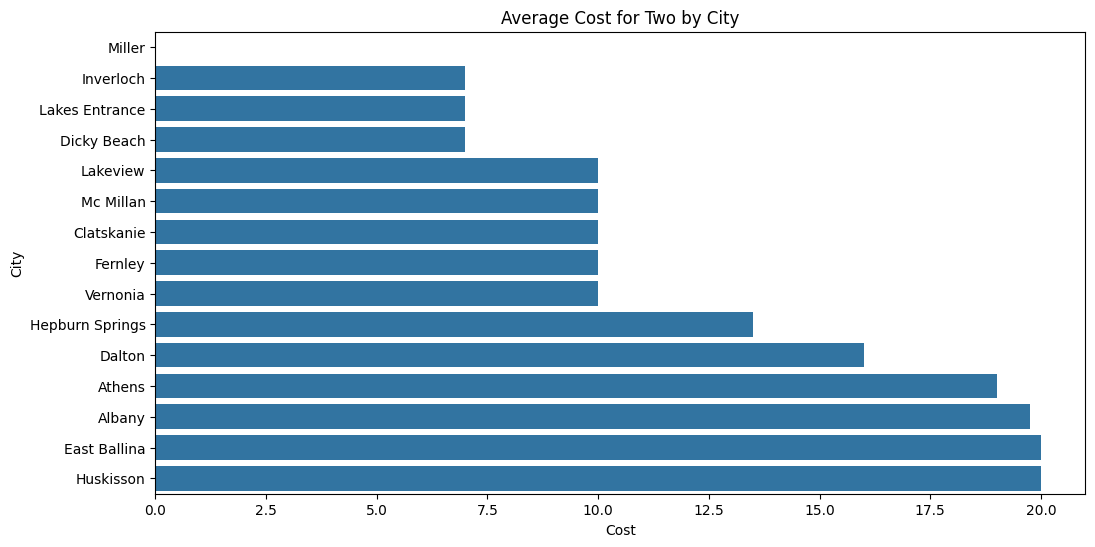

In [8]:
#average cost per city
if 'Average Cost for two' in df.columns:
    cost_col = 'Average Cost for two'
elif 'Cost' in df.columns:
    cost_col = 'Cost'
else:
    raise ValueError("No cost column found. Dataset column missing.")

city_cost = df.groupby('City')[cost_col].mean().sort_values().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=city_cost.values, y=city_cost.index)
plt.title("Average Cost for Two by City")
plt.xlabel("Cost")
plt.ylabel("City")
plt.show()


In [10]:
top_cuisine_city = (
    df.groupby('City')['Cuisines']
    .agg(lambda x: x.value_counts().idxmax() if x.value_counts().size > 0 else "Unknown")
    .reset_index()
)

top_cuisine_city.head(10)


City                                           Cuisines
0  Abu Dhabi                                           American
1       Agra                              North Indian, Mughlai
2  Ahmedabad  Chinese, Italian, North Indian, Mexican, Medit...
3     Albany                             Japanese, Steak, Sushi
4  Allahabad                              North Indian, Chinese
5   Amritsar                                       North Indian
6     Ankara                               Kebab, Turkish Pizza
7   Armidale                                    Bar Food, Steak
8     Athens                           American, Italian, Pizza
9   Auckland                                           Desserts